## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [ ]:
# resources 

# https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/
# https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
# https://www.youtube.com/watch?v=IQhh6myW6Fw
# https://stackabuse.com/calculating-mean-median-and-mode-in-python/
# https://stackoverflow.com/questions/35932223/writing-a-train-test-split-function-with-numpy
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

In [40]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# load data
wine=datasets.load_wine()

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']


# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

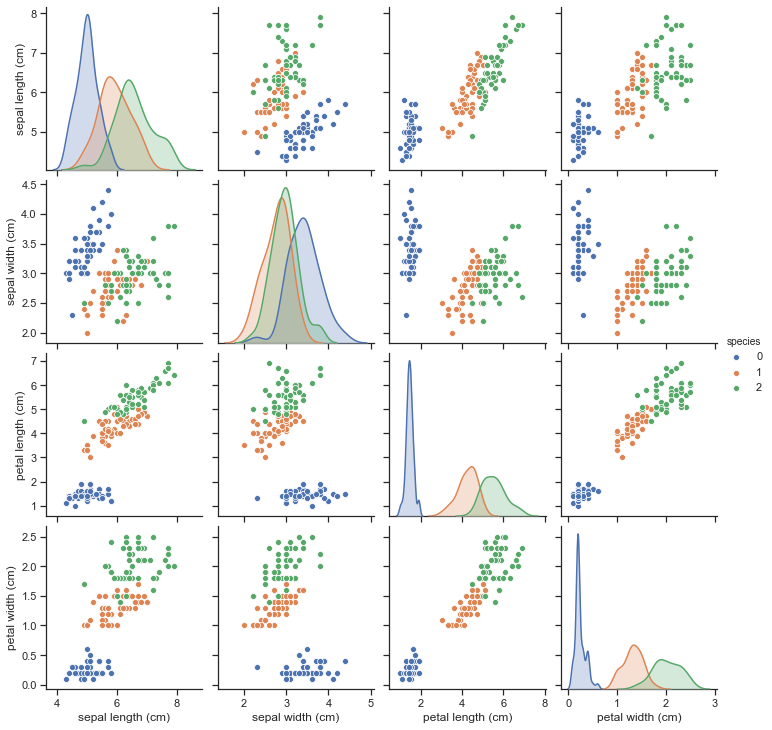

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [41]:
# set a data variable equal to the dataframe of selected features
data = df_wine[selected_features]

# retrieve the labels of selected feutures by using keys() method
labels = df_wine[selected_features].keys()

#define the function that takes as parameters :
    # the list of features
    # the labels
    # the selected features database to make a copy
    # and the target y
    
def myplotGrid(X,y , data , labels):
    """parameters:
    # the list of features(X)
    # and the target y
    # the selected features database to make a copy
    # the labels of the dataset 
    
    output : 
    # plots a seaborn pairplot graph
    """
    
    # create a copy of the selected features data
    finalData = data.copy()
    
    # link data and labels
    finalData[labels]= X
    
    # create a database entry called target and set to y
    finalData['target'] = y
    
    # use seaborn for pairploting the data to the new target entry
    sns.pairplot(finalData,hue = 'target')    

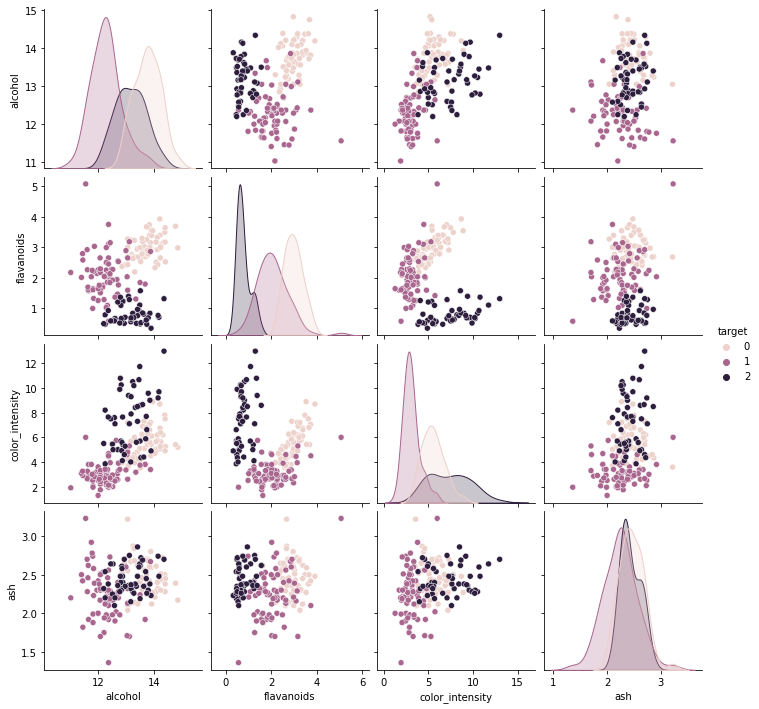

In [42]:
# run the plotting function
myplotGrid(X,y, data , labels )

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

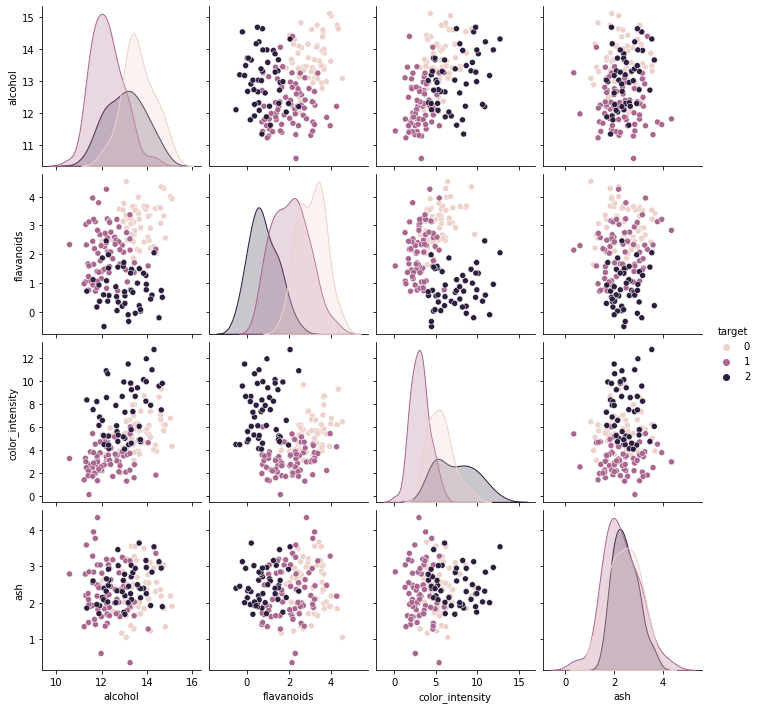

In [43]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

myplotGrid(XN,y, data , labels )


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

I would choose the flavanoids and color intensity features , the reason for this being that there is less overlapping data points compared to other results. Therefore data could be seperated easier and more accurate predictions could be made for the expected target wine class. To go into more detail , the dataa target of each class of wine falls into a certain range with very few odd results. Wine classes of 2 fall in the range of 2 flavanoids and colour intensity of 4-12 . Wine of class 1 rarely has a colour intensity higher than 4-5 and have flavanoids in the range of 1 - 3. Wine of class 0 has color intensity higher than 4 but flavanoids higher than 2 . 
    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

The data with noise is much more spread out for each comparison , creating more inconsistencies and making it difficult to make clear distinctions between wine classes without overlapping values. Flavanoids are especially exagerated compared to the noisless graph. Even though the data is  more spread out , it is still possible in some cases to invision what areas the data occupies without noise . 




## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [44]:
# helper code

# this imprted module only retrieves the mode of output labels in the myKNN function 
from scipy.stats import mode

# eucledian distance function 
def eucledian(point1,point2):
    dist = np.sqrt(np.sum((point1-point2)**2))
    return dist


#creating test Data for my KNN function with function
def shuffle_split_data(X, y):
    """parameters:
      # features X and target y
    
    output : 
    # returns training data and testing data for X and y
    """
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 80)
    
    # assign training data to random array generated above
    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    return X_train, y_train, X_test, y_test

#setting training data variables
X_train, y_train, X_test, y_test = shuffle_split_data(X,y)


In [45]:
# the knn func takes  all required arguments and k is number of neighbours

def mykNN(X, y , X_, k):
    """parameters:
      # features X and target y
      # X_ testing data 
      # k neigbours
    output : 
    # returns predicted y_ values 
    """
    op_labels = [] 
    
    #Loop through the Datapoints to be classified
    for item in X_: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(X)): 
            distances = eucledian(np.array(X[j,:]) , item) 
            
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
        
        
        
        #calculating mode using scipy.stats module 
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)        
    
    return op_labels

The following cell compares the test data to the predicted data

In [46]:
# view testing data for comparison
print(y_test)

# join and split is used to formulate the output of myknnn like the testing data for comparison 
y_ = ''.join(str(mykNN(X_train,y_train,X_test , 10)).split(','))

# view predicted data for comparison
print(y_)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


The following code is used to compare values of importet libraries compared to my own function

In [47]:
# only for testing purpose
# use the same training data as myKnn 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print(y_test) # true values
print(y_pred) # predicted values

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


Above we can see that the same results were found by mykNN function

## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [48]:
# change the variables of predicted y and training data for later comparison

In [49]:
X_train, y_train, X_test, y_test = shuffle_split_data(X,y)
y_pred = mykNN(X_train,y_train,X_test , 10)

In [50]:
 # confusion matrix generation code
    
def myConfMat(y_ground,y_pred,classno):
    """parameters:
      # y test data
      # y predicted data 
      # len(np.unique(y)) - test values
    output : 
    # returns a confusion matrix 
    """
    C= np.zeros((classno,classno),dtype=int)
    for i in range(0,len(y_test)):
            C[y_ground[i],y_pred[i]]+=1
    return C

# code to display confusion matrix
print(myConfMat(y_test,y_pred,len(np.unique(y))))


[[12  0  0]
 [ 3 12  0]
 [ 0  0  9]]


In [51]:
# accuracy calculation function

def myAccuracy(y_ground,y_pred):
    """parameters:
      # y test data
      # y predicted data 
    output : 
    # returns accuracy 
    """
    correct = np.where(y_ground==y_pred, 1, 0 )
    total = len(y_ground)
    
    return sum(correct)/total
    
# print the accuracy (as a float to two decimal points)
print('accuracy: %.2f' % myAccuracy(y_test,y_pred))

accuracy: 0.92



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


I was unable to implement nested cross-validation successfully therefore i only have a function that implements normal cross validation. My iterations of folds was implemented incorectly and therefore only had error outputs. 
    


In [53]:

def myCrossVal(X,y,foldK):
    
    accuracy_fold=[] #list to store accuracies folds
    
    np.random.seed(0)
    
    # Creates an array of random permutation of indices between 0 and the length of the X data.
    indices = np.random.permutation(np.arange(0,len(X),1))
    
    #TASK: use the function array_split to split the indices to k different bins:
    bins = np.array_split(indices, foldK)
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        #TASK: take bin i for testing, rest for training. 
        # Can use the function extend to add indices to foldTrain and foldTest
        foldTest = bins[i]
        
        for j in range(0,foldK):
            if j!=i:
                foldTrain.extend( bins[j] )
        
        #train kNN classifier
        y_pred = mykNN(X[foldTrain,:],y[foldTrain],X[foldTest,:] , 10)
        
        #append the new accuracy to your accuracy_fold list.  
        accuracy_fold.append( myAccuracy(y[foldTest],y_pred) )
        
    return accuracy_fold;
    
accuracy_fold=myCrossVal(XN,y,25)

## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.914  |  5 | ?  |
| 2 | 0.882  |  10 | ?  |
| 3 | 1.0  |  15 | ?  |
| 4 | 0.89  |  20 | ?  |
| 5 | 0.83  |  25 | ?  |
| **total** |  $\pm$ ? | 0.903  |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.94  |  5 |  ? |
| 2 | 0.82  |  10 | ?  |
| 3 | 0.901  |  15 | ?  |
| 4 | 0.78  |  20 |  ? |
| 5 | 0.86  | 25  |  ?|
| **total** |  $\pm$? |  0.861 |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [26]:
print('CLEAN')
# clean data summary results



print('NOISY')
# clean data summary results


CLEAN
NOISY


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

Both the noisy and clean data return similar results , even though the clean data is more accurate , the difference in accuracy is very small and therefore i believe that the data has no impact on the parameters. However from the data collected it is clear to see that lower k numbers lead to higher accuracy scores in both clean and noisy data. Therefore i believe lower k values are a beter parameter to use. Furthermore euclidian data will always be shorter or equal than manhatten data. Therefore using euclidian to estimate short distances will be beter and manhattan estimation would be more accurate on further distances. 



### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

I would decrease k since there could not be a tie if k is equal to 1  and both increase k once to see if k=3 favors a certain neighbour

psuedocode :

 func testclass
 
 for neighbours in k
 
 if neighbours distance = next neigbours distance
 
 //reduce k and run the function again to see what was selected 
 
 ( myneigboursfunc(k-1) ) = val
 
 return val as nearesat neigbour
     
        



### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: Firstly i would have to evaluate the dataset to see if it is consistent with the wine dataset. I would also have to edit the helper code to be more robust and maybe have more options to compare with. mykNN function in my opinion is quite robust and i believe would be able to use on other datasets since it was consistently correct to the imported libraries. I would like a more elaborate way of selecting training data and change variables to be more consistent with how skllearn trains data. 
